# MPEG-7 Experiments

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
sys.path.append("..")
from curvature import *
from dtw import *
from mergetree import *
from matching import *
from matching_plots import *
from evaluation import *
import subprocess
import os
import glob
import scipy.io as sio

In [2]:
methods = ["circular_dtw", "circular_dope", "wasserstein", "euclidean", "bottleneck"]
Ds = {m:np.array([]) for m in methods}
for i in range(720):
    res = sio.loadmat("../results/mpeg7_{}.mat".format(i))
    for m in methods:
        if Ds[m].size == 0:
            Ds[m] = res[m]
        else:
            Ds[m] = np.concatenate((Ds[m], res[m]), axis=0)
for m in methods:
    print(Ds[m].shape)
    M = min(Ds[m].shape)
    Ds[m] = Ds[m][0:M, 0:M]
    Ds[m] += Ds[m].T

(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)


(1440, 1440)


/tmp/ipykernel_72935/4197460880.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(Ds[m][1000::, 1000::]))
/tmp/ipykernel_72935/4197460880.py:7: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(Ds[m][1000::, 1000::]))


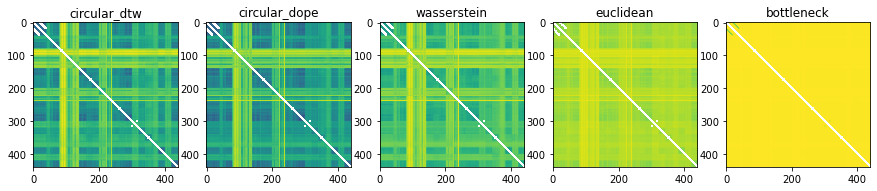

In [3]:
print(Ds["circular_dtw"].shape)
res = 3
K = len(methods)
plt.figure(figsize=(res*K, res))
for i, m in enumerate(methods):
    plt.subplot(1, K, i+1)
    plt.imshow(np.log(Ds[m][1000::, 1000::]))
    plt.title(m)


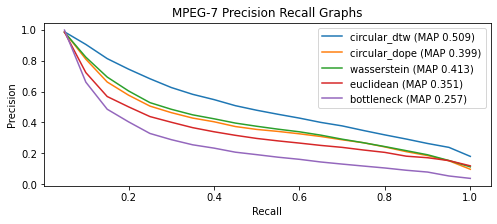

In [4]:
fac = 0.5
plt.figure(figsize=(fac*16, fac*6))
total = 1440
n_per_class = 20
N = np.ceil(total/n_per_class)
idx_train = np.arange(N)[:, None]*np.ones((1, n_per_class))
idx_train = idx_train.flatten()[0:total]
idx_test = idx_train
legend = []
for m in methods:
    idx = np.argsort(Ds[m], axis=0)
    pr, _ = get_precision_recall(idx, idx_train, idx_test)
    pr = np.reshape(pr, (total, n_per_class))
    pr = np.mean(pr, axis=0)
    plt.plot(np.linspace(1/len(pr), 1, len(pr)), pr)
    legend.append("{} (MAP {:.3f})".format(m, np.mean(pr)))
plt.legend(legend)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("MPEG-7 Precision Recall Graphs")
plt.savefig("MPEG7.svg", bbox_inches='tight')